In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))

from ctgan import CTGANSynthesizer
from ctgan import load_demo

Iris.csv



In [2]:
iris = pd.read_csv("data/Iris.csv")
iris_columns = iris.columns

In [3]:
iris_ctgan = CTGANSynthesizer(epochs=1000)
iris_ctgan.fit(iris, iris_columns)

In [4]:
iris_samples = iris_ctgan.sample(100)

In [5]:
iris_samples.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,58,7.3,3.0,1.0,0.4,Iris-setosa
1,130,4.8,2.0,5.5,1.8,Iris-virginica
2,18,6.7,3.0,4.7,2.1,Iris-virginica
3,106,6.1,2.7,4.0,1.8,Iris-virginica
4,91,6.5,2.8,5.3,0.1,Iris-virginica


In [6]:
iris_samples["Species"].value_counts()

Iris-virginica     36
Iris-versicolor    36
Iris-setosa        28
Name: Species, dtype: int64

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


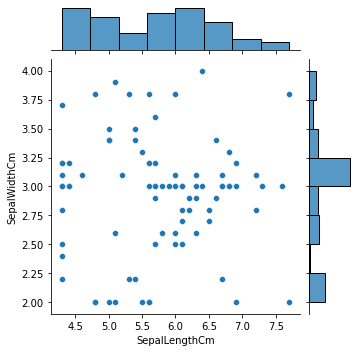

In [7]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_samples, size=5)

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


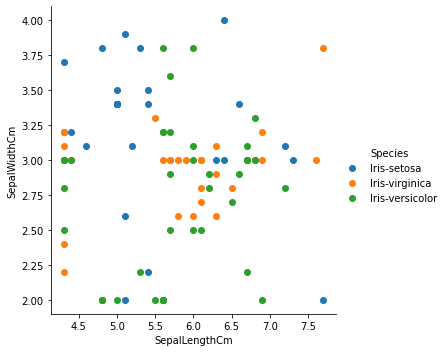

In [8]:
sns.FacetGrid(iris_samples, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

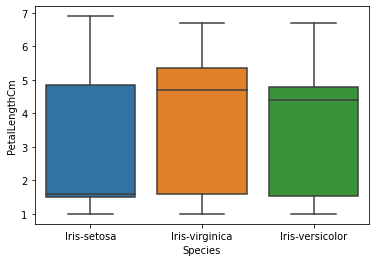

In [9]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris_samples)

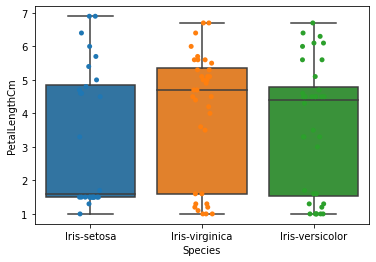

In [10]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris_samples)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris_samples, jitter=True, edgecolor="gray")

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

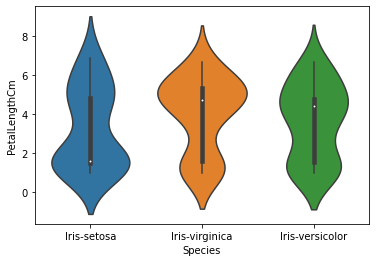

In [11]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris_samples, size=6)

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


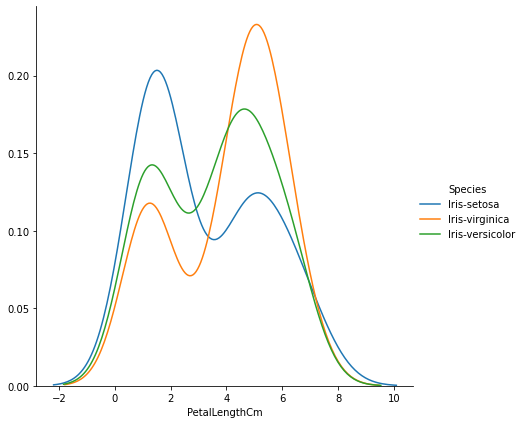

In [12]:
sns.FacetGrid(iris_samples, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


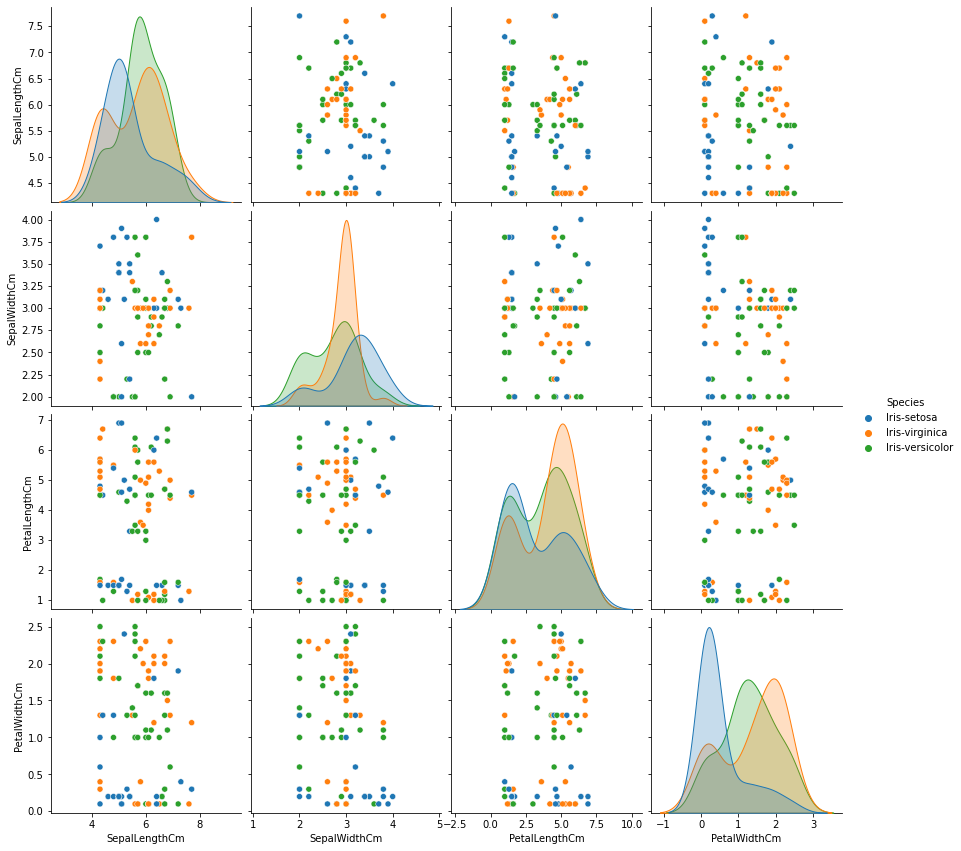

In [13]:
sns.pairplot(iris_samples.drop("Id", axis=1), hue="Species", size=3)

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


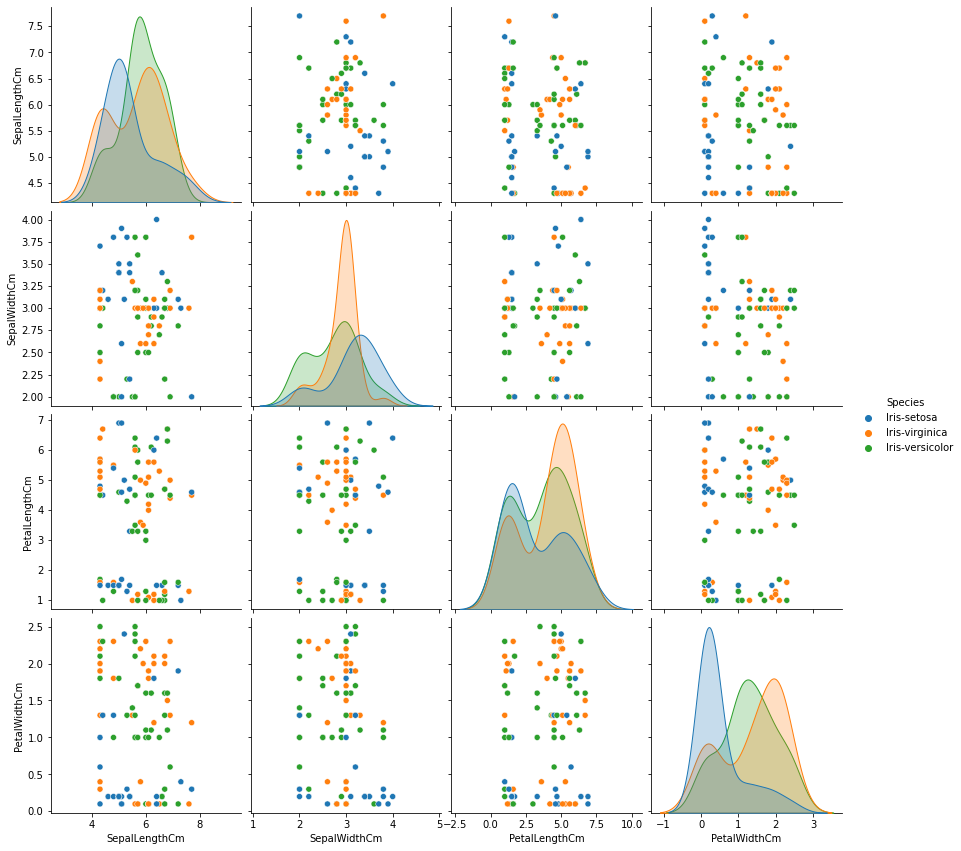

In [14]:
sns.pairplot(iris_samples.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

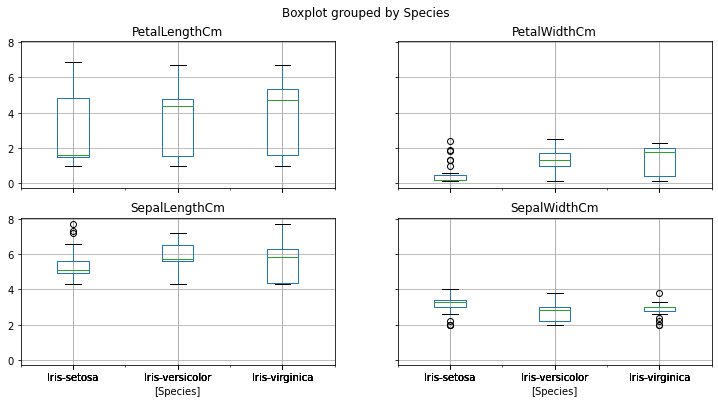

In [15]:
iris_samples.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

<AxesSubplot:>

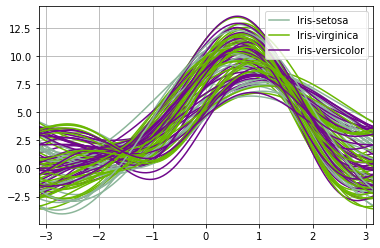

In [16]:
from pandas.plotting import andrews_curves
andrews_curves(iris_samples.drop("Id", axis=1), "Species")

<AxesSubplot:>

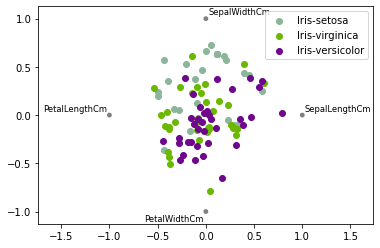

In [17]:
from pandas.plotting import radviz
radviz(iris_samples.drop("Id", axis=1), "Species")